# Classical UMAP
TODO: Implement UMAP files post processing, these are still "raw" data files transformed by Oliver. 
After discussing with Oliver, it is valuable to show the UMAP visualizations at batch level for CD14, CD3, CD4, CD8, and FOXP3, which show binary behavior. We would not expect these to differ greatly in different cell populations in healthy versus diseased state. 

In [3]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import os

### Removes time column.
TODO: Check with Rafael/Oliver/Adrian, is this appropriate?

In [27]:
def umapBatch(path, drop, output_path, neighbors=5, dist=0.1, metric="correlation", markers=["CD14", "CD3", "CD4", "CD8", "FOXP3"] ):
   
    name = path.split("/")[-1]
    name = name.split(" ")[2]
    name = name.split("_")[1]

    # Create folder for figures
    print("Sample name is", name)
    dir = output_path+"/"+name
    os.makedirs(dir, exist_ok=True)
    print("Output path created")

    ## Function to perform UMAP on .csv file output 
    dat = pd.read_csv(path)

   
    #dat.CD25.value_counts()
    if drop:
        dat = dat.drop(dat.columns[-1], axis=1) 
    
    # Run UMAP transformation on the data
    dat_umap = umap.UMAP(n_neighbors=neighbors, min_dist=dist, metric=metric).fit_transform(dat)

    
    # Iterate over the markers and plot the points with different colors
    for marker in markers:
        
        if marker not in dat.columns:
            print(f"Marker {marker} not in data.")
            continue

        # Create a new figure
        plt.figure()

        marker_data = dat[marker].values
        plt.scatter(dat_umap[:, 0], dat_umap[:, 1], c=marker_data, label=marker, s=2)
        
        # Add a color bar and legend
        plt.colorbar()
        plt.legend()
        
        # Save the figure
        plt.savefig(dir+f"/umap_plot_{marker}.png")
        
        # Print a message when the plot is generated
        print(f"{marker} UMAP plot generated successfully.")
    

Sample name is 079
Output path created
CD14 UMAP plot generated successfully.
CD3 UMAP plot generated successfully.
CD4 UMAP plot generated successfully.
CD8 UMAP plot generated successfully.
FOXP3 UMAP plot generated successfully.


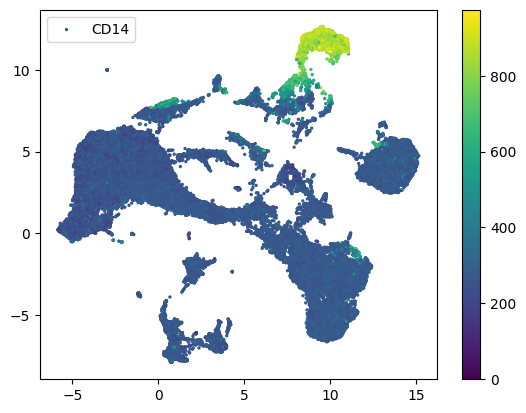

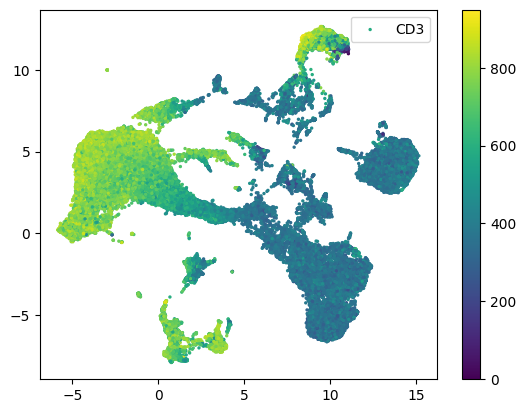

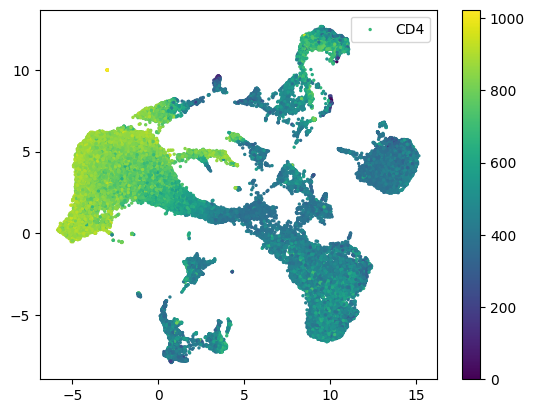

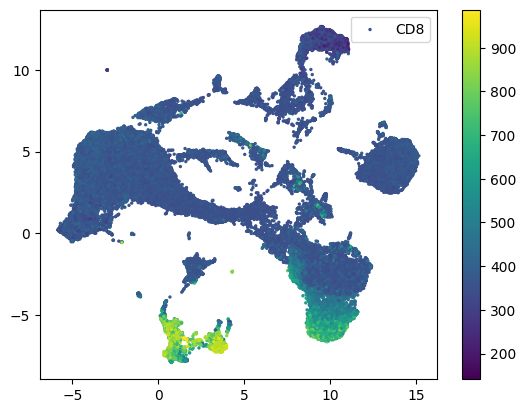

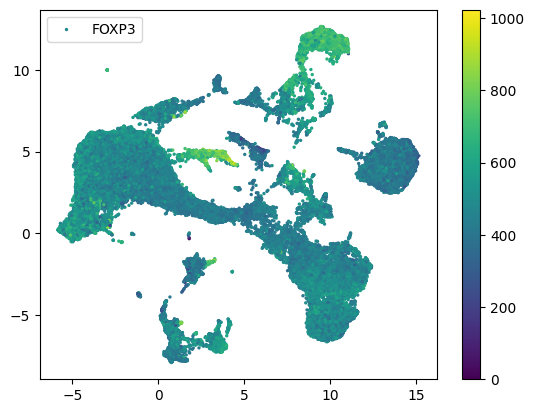

In [28]:
umapBatch("/Users/NinaValenbreder/Cambridge/Thesis/Data/ST1_20181025/AD SAMPLES_AD-001 C_079_Live Cells.csv", True, "/Users/NinaValenbreder/Cambridge/Thesis/Data/ST1_20181025")


Sample name is 078
Output path created
CD14 UMAP plot generated successfully.
CD3 UMAP plot generated successfully.
CD4 UMAP plot generated successfully.
CD8 UMAP plot generated successfully.
FOXP3 UMAP plot generated successfully.


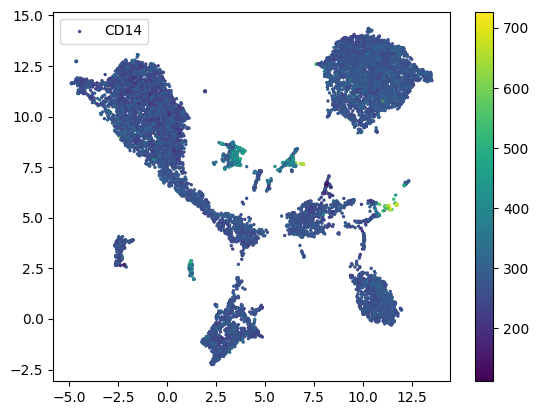

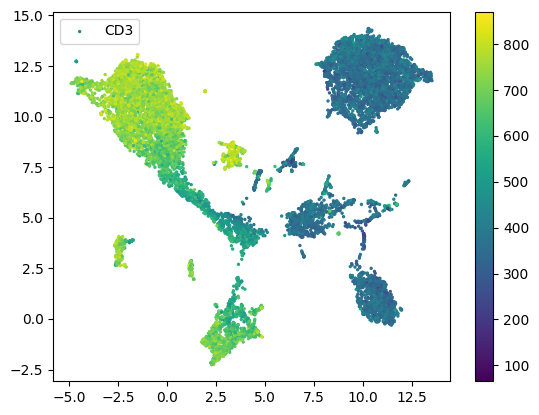

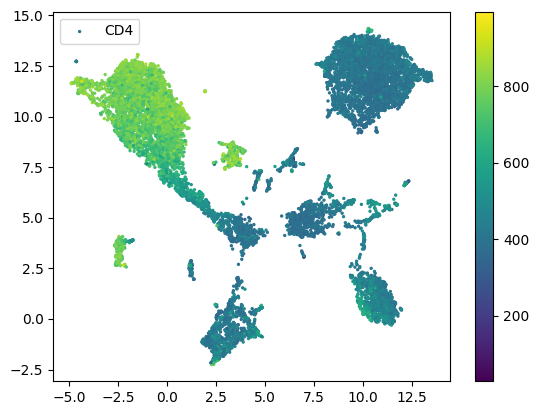

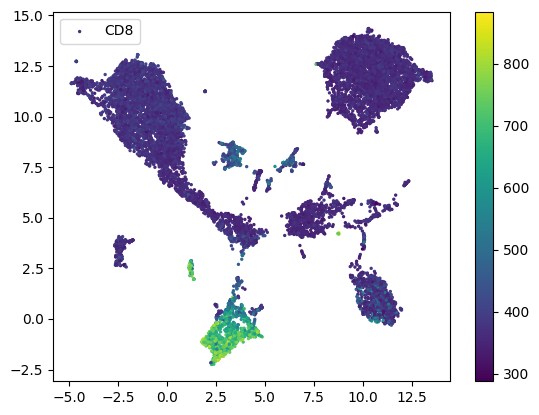

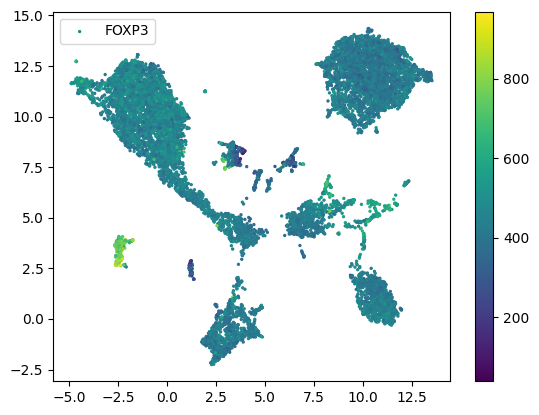

In [29]:
umapBatch("/Users/NinaValenbreder/Cambridge/Thesis/Data/ST1_20181025/AD SAMPLES_AD-001 P_078_Live Cells.csv", True, "/Users/NinaValenbreder/Cambridge/Thesis/Data/ST1_20181025")

Sample name is 080
Output path created
CD14 UMAP plot generated successfully.
CD3 UMAP plot generated successfully.
CD4 UMAP plot generated successfully.
CD8 UMAP plot generated successfully.
FOXP3 UMAP plot generated successfully.


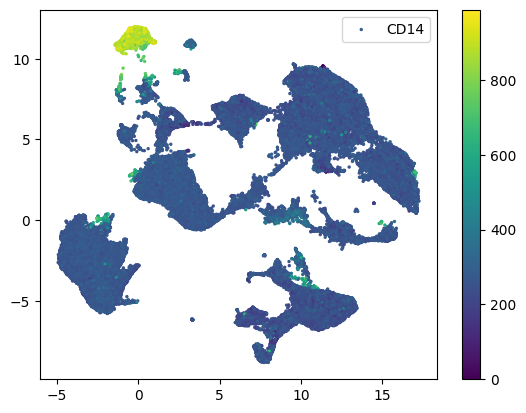

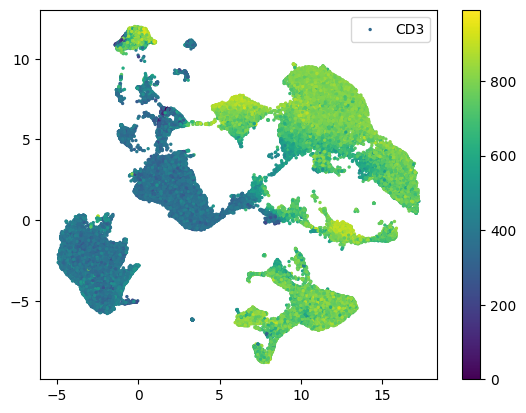

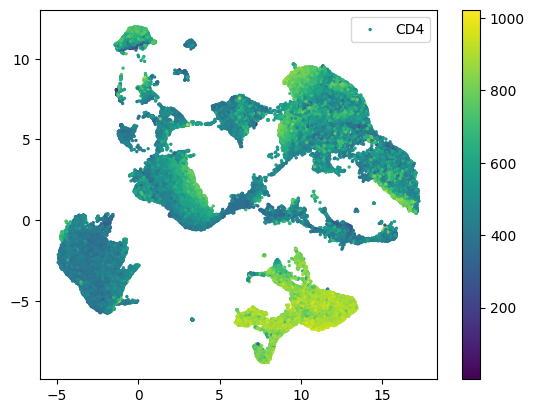

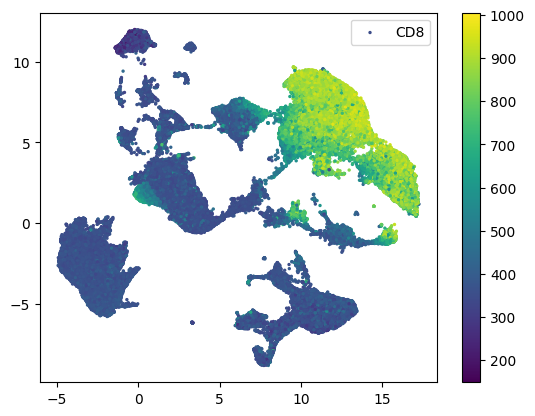

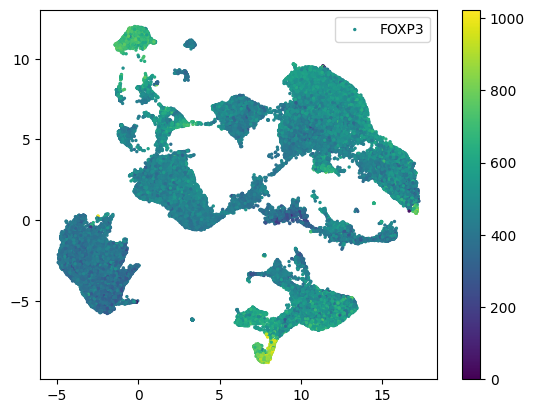

In [30]:
umapBatch("/Users/NinaValenbreder/Cambridge/Thesis/Data/ST1_20181025/AD SAMPLES_AD-002 P_080_Live Cells.csv", True, "/Users/NinaValenbreder/Cambridge/Thesis/Data/ST1_20181025")

Sample name is 082
Output path created
CD14 UMAP plot generated successfully.
CD3 UMAP plot generated successfully.
CD4 UMAP plot generated successfully.
CD8 UMAP plot generated successfully.
FOXP3 UMAP plot generated successfully.


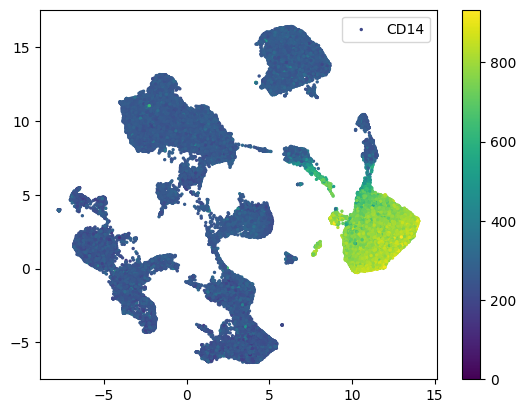

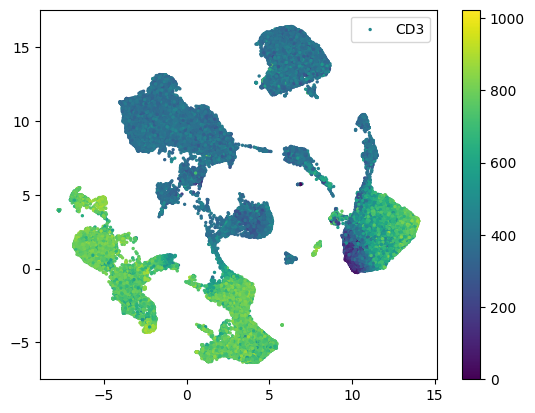

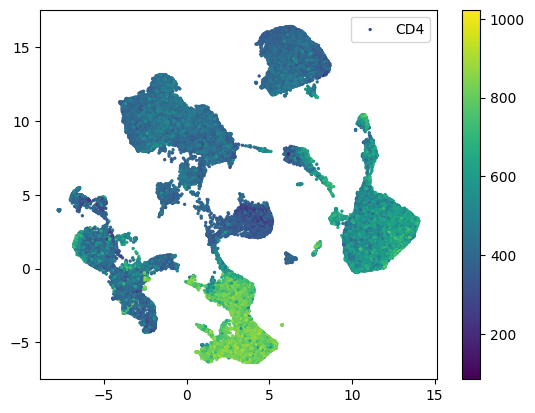

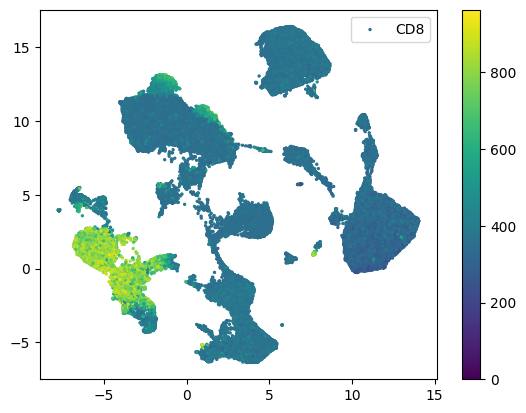

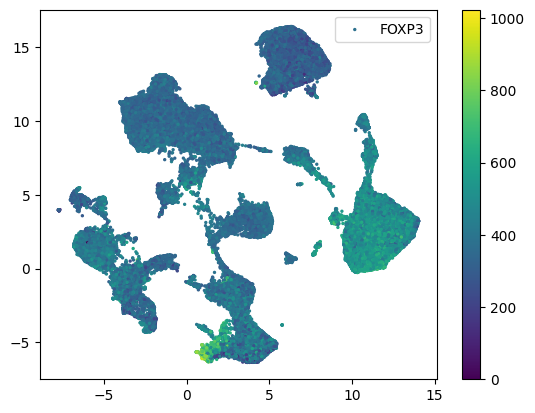

In [31]:
umapBatch("/Users/NinaValenbreder/Cambridge/Thesis/Data/ST1_20181025/AD SAMPLES_AD-003 C_082_Live Cells.csv", True, "/Users/NinaValenbreder/Cambridge/Thesis/Data/ST1_20181025")